In [1]:
# data manipulation libraries
import numpy as np
import pandas as pd
from ast import literal_eval
from sklearn.model_selection import train_test_split

# pyspark
import pyspark
from pyspark import SparkContext
from pyspark.sql import SparkSession
from pyspark.conf import SparkConf
from pyspark.sql import types, functions as F

# random seed for reproducibility
RANDOM_SEED = 15

import shap
import xgboost as xgb
from catboost import CatBoostRegressor
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from cycler import cycler
from sklearn.model_selection import RepeatedKFold
plt.style.use('seaborn-white')

app_name = 'poi-reseller'
conf = (SparkConf()
        .setMaster("yarn-client")
        .setAppName(app_name)
        .set("spark.executor.memory", "8g")
        .set("spark.executor.instances", "1")
        .set("spark.executor.cores", "4")
        .set("spark.driver.memory", "8g")
        .set("spark.yarn.queue", "root.hue_dmp")
        .set("spark.default.parallelism", "8")
        .set("spark.sql.shuffle.partitions", "1000")
        .set("spark.shuffle.service.enabled", "true")
        .set("spark.dynamicAllocation.enabled", "true")
        .set("spark.yarn.driver.memoryOverhead", "4096")
        .set("spark.yarn.executor.memoryOverhead", "4096")
        .set("spark.kryoserializer.buffer.max", "1g")
        .set("spark.dynamicAllocation.minExecutors", "1")
        .set("spark.dynamicAllocation.maxExecutors", "20")
        .set("spark.driver.maxResultSize", "4g")
        .set("spark.sql.crossJoin.enabled", "true")
        .set("spark.hadoop.fs.permissions.umask-mode", "002")
        .set("spark.sql.autoBroadcastJoinThreshold", "-1")
        .set("spark.dynamicAllocation.initialExecutors", "1"))
sc = SparkContext.getOrCreate(conf=conf)
spark = SparkSession(sc)
spark


Bad key backend.qt4 in file /etc/matplotlib/matplotlibrc, line 43 ('backend.qt4 : PyQt4        # PyQt4 | PySide')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.2/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
#df1 = spark.read.table('dbi.sample_site_for_outlet_v2')
#df1 = df1.toPandas()

In [3]:
#Spark Reead : for Aggregation :

pd.options.display.max_columns = None
pd.options.display.max_rows = None

df_input = spark.sql("""select 
                        site_id as site_id,
                        site_name as site_name,
                        long as long,
                        lat as lat,
                        class as class,
                        kecamatan as kecamatan,
                        kabupaten as kabupaten,
                        region as region,
                        subs_4g as subs_4g,
                        fea_min_distance_outlet_to_leisure_and_outdoor as min_distance_from_site_to_POI_catefgory_leisure_and_outdoor,
                        fea_min_distance_outlet_to_areas_and_buildings as min_distance_from_site_to_POI_catefgory_areas_and_buildings,
                        fea_min_distance_outlet_to_shopping as min_distance_from_site_to_POI_catefgory_shopping,
                        fea_min_distance_outlet_to_going_out_entertainment as min_distance_from_site_to_POI_catefgory_going_out_entertainment,
                        fea_min_distance_outlet_to_sights_and_museums as min_distance_from_site_to_POI_catefgory_sights_and_museums,
                        fea_min_distance_outlet_to_facilities as min_distance_from_site_to_POI_catefgory_facilities,
                        fea_min_distance_outlet_to_accommodation as min_distance_from_site_to_POI_catefgory_accommodation,
                        fea_min_distance_outlet_to_natural_and_geographical as min_distance_from_site_to_POI_catefgory_natural_and_geographical,
                        fea_min_distance_outlet_to_business_and_services as min_distance_from_site_to_POI_catefgory_business_and_services,
                        fea_min_distance_outlet_to_transport as min_distance_from_site_to_POI_catefgory_transport,
                        fea_min_distance_outlet_to_eat_and_drink as min_distance_from_site_to_POI_catefgory_eat_and_drink,
                        fea_outlet_under_100m_to_leisure_and_outdoor as number_of_POI_within_100m_category_leisure_and_outdoor,
                        fea_outlet_under_100m_to_areas_and_buildings as number_of_POI_within_100m_category_areas_and_buildings,
                        fea_outlet_under_100m_to_shopping as number_of_POI_within_100m_category_shopping,
                        fea_outlet_under_100m_to_going_out_entertainment as number_of_POI_within_100m_category_going_out_entertainment,
                        fea_outlet_under_100m_to_sights_and_museums as number_of_POI_within_100m_category_sights_and_museums,
                        fea_outlet_under_100m_to_facilities as number_of_POI_within_100m_category_facilities,
                        fea_outlet_under_100m_to_accommodation as number_of_POI_within_100m_category_accommodation,
                        fea_outlet_under_100m_to_business_and_services as number_of_POI_within_100m_category_business_and_services,
                        fea_outlet_under_100m_to_transport as number_of_POI_within_100m_category_transport, 
                        availability as availability,
                        bandwidth as available_network_resources
                    from
                        dbi.sample_site_for_outlet_v2 b 
""").toPandas()
df_input.head()


,site_id,site_name,long,lat,class,kecamatan,kabupaten,region,subs_4g,min_distance_from_site_to_POI_catefgory_leisure_and_outdoor,min_distance_from_site_to_POI_catefgory_areas_and_buildings,min_distance_from_site_to_POI_catefgory_shopping,min_distance_from_site_to_POI_catefgory_going_out_entertainment,min_distance_from_site_to_POI_catefgory_sights_and_museums,min_distance_from_site_to_POI_catefgory_facilities,min_distance_from_site_to_POI_catefgory_accommodation,min_distance_from_site_to_POI_catefgory_natural_and_geographical,min_distance_from_site_to_POI_catefgory_business_and_services,min_distance_from_site_to_POI_catefgory_transport,min_distance_from_site_to_POI_catefgory_eat_and_drink,number_of_POI_within_100m_category_leisure_and_outdoor,number_of_POI_within_100m_category_areas_and_buildings,number_of_POI_within_100m_category_shopping,number_of_POI_within_100m_category_going_out_entertainment,number_of_POI_within_100m_category_sights_and_museums,number_of_POI_within_100m_category_facilities,number_of_POI_within_100m_category_accommodation,number_of_POI_within_100m_category_business_and_services,number_of_POI_within_100m_category_transport,availability,available_network_resources
0,DPR033,DPR033M41_HotelintanSari,115.209720,-8.658200,Silver,DENPASAR BARAT,KOTA DENPASAR,BALI NUSRA,176.0,42.67,469.39,23.12,59.18,20.29,17.70,22.54,3024.48,20.68,74.15,25.11,1.0,0.0,32.0,1.0,2.0,10.0,1.0,11.0,1.0,100.0,150.0
1,BIM187,BIM187M41_DoroLuwu,118.516720,-8.478212,Silver,MADA PANGGA,BIMA,BALI NUSRA,264.0,709.89,1148.85,66.48,8445.20,55.11,527.42,3192.16,7228.01,585.75,3286.25,3644.60,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,100.0,90.0
2,SMD390,SMD390M41_DSNKIRISIKPAJAGANIGIHON-GHN,108.169472,-6.967944,Bronze,JATINUNGGAL,SUMEDANG,WEST JAVA,80.0,3176.05,552.13,40.04,2238.89,117.56,37.10,2449.66,11302.95,45.67,1629.87,58.46,0.0,0.0,14.0,0.0,0.0,4.0,0.0,5.0,0.0,100.0,30.0
3,SUB518,SUB518M41_DUSUNTENGAH-TBG,107.825800,-6.277200,Gold,PAMANUKAN,SUBANG,WEST JAVA,614.0,622.39,613.37,310.83,338.56,338.70,364.56,1004.12,0.00,295.08,1002.56,322.47,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,90.0
4,BIR300,BIR300MM2-MATANG-REULEUT,96.598663,5.203829,Bronze,PEUDADA,BIREUEN,SUMBAGUT,107.0,4511.92,380.06,442.76,1430.14,52.53,112.37,2216.73,0.00,399.68,1745.68,210.40,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,100.0,30.0


In [8]:
#Spark Reead : for Aggregation :

pd.options.display.max_columns = None
pd.options.display.max_rows = None

df_100m = spark.sql("""select 
                        b.kecamatan,
                        sum(b.subs_4g) as subs_4g,
                        avg(b.fea_min_distance_outlet_to_leisure_and_outdoor) min_distance_from_site_to_POI_catefgory_leisure_and_outdoor,
                        avg(b.fea_min_distance_outlet_to_areas_and_buildings) min_distance_from_site_to_POI_catefgory_areas_and_buildings,
                        avg(b.fea_min_distance_outlet_to_shopping) min_distance_from_site_to_POI_catefgory_shopping,
                        avg(b.fea_min_distance_outlet_to_going_out_entertainment) min_distance_from_site_to_POI_catefgory_going_out_entertainment,
                        avg(b.fea_min_distance_outlet_to_sights_and_museums) min_distance_from_site_to_POI_catefgory_sights_and_museums,
                        avg(b.fea_min_distance_outlet_to_facilities) min_distance_from_site_to_POI_catefgory_facilities,
                        avg(b.fea_min_distance_outlet_to_accommodation) min_distance_from_site_to_POI_catefgory_accommodation,
                        avg(b.fea_min_distance_outlet_to_natural_and_geographical) min_distance_from_site_to_POI_catefgory_natural_and_geographical,
                        avg(b.fea_min_distance_outlet_to_business_and_services) min_distance_from_site_to_POI_catefgory_business_and_services,
                        avg(b.fea_min_distance_outlet_to_transport) min_distance_from_site_to_POI_catefgory_transport,
                        avg(b.fea_min_distance_outlet_to_eat_and_drink) min_distance_from_site_to_POI_catefgory_eat_and_drink,
                        avg(b.availability) availability,
                        avg(b.cei_rating) cei_rating,
                        avg(b.nei_rating) nei_rating,
                        avg(b.bandwidth) available_network_resources
                    from
                        dbi.sample_site_for_outlet_v2 b 
                    where 
                        b.subs_4g > 100
                     group by kecamatan
""").toPandas()
df_100m.head()

,kecamatan,subs_4g,min_distance_from_site_to_POI_catefgory_leisure_and_outdoor,min_distance_from_site_to_POI_catefgory_areas_and_buildings,min_distance_from_site_to_POI_catefgory_shopping,min_distance_from_site_to_POI_catefgory_going_out_entertainment,min_distance_from_site_to_POI_catefgory_sights_and_museums,min_distance_from_site_to_POI_catefgory_facilities,min_distance_from_site_to_POI_catefgory_accommodation,min_distance_from_site_to_POI_catefgory_natural_and_geographical,min_distance_from_site_to_POI_catefgory_business_and_services,min_distance_from_site_to_POI_catefgory_transport,min_distance_from_site_to_POI_catefgory_eat_and_drink,availability,cei_rating,nei_rating,available_network_resources
0,LONGKIB,134.0,7159.650000,1454.060000,6630.810000,12297.270000,1250.140000,258.890000,15365.900000,0.000000,5528.380000,0.000000,1288.390000,100.000000,3.901838,3.327989,90.000000
1,BAITURRAHMAN,13028.0,313.158696,239.236087,53.360435,224.850000,103.160870,48.330000,188.214783,0.000000,41.703478,321.136522,75.632174,100.000000,4.674971,3.584661,106.956522
2,TANJUNGANOM,6384.0,1750.240909,892.628182,179.470909,2150.210000,349.133636,167.148182,1391.809091,3770.685455,252.965455,2348.627273,200.818182,99.987374,4.064341,3.067871,113.636364
3,PADANG UTARA,24350.0,414.605937,298.962500,50.041250,235.780000,111.087813,57.321562,164.410313,2521.945625,58.221875,177.319687,64.180000,100.000000,NaN,NaN,105.156250
4,AMBARAWA,6697.0,783.605714,471.123571,81.397143,726.416429,141.305714,120.708571,699.740000,3164.219286,115.232143,1330.619286,145.575714,100.000000,4.041881,3.295456,97.142857


In [4]:
iudf = spark.sql("""select 
                        b.kecamatan,
                        b.class,
                        sum(b.subs_4g) as subs_4g,
                        sum(b.fea_outlet_under_100m_to_leisure_and_outdoor) number_of_POI_within_100m_category_leisure_and_outdoor,
                        sum(b.fea_outlet_under_100m_to_areas_and_buildings) number_of_POI_within_100m_category_areas_and_buildings,
                        sum(b.fea_outlet_under_100m_to_shopping) number_of_POI_within_100m_category_shopping,
                        sum(b.fea_outlet_under_100m_to_going_out_entertainment) number_of_POI_within_100m_category_going_out_entertainment,
                        sum(b.fea_outlet_under_100m_to_sights_and_museums) number_of_POI_within_100m_category_sights_and_museums,
                        sum(b.fea_outlet_under_100m_to_facilities) number_of_POI_within_100m_category_facilities,
                        sum(b.fea_outlet_under_100m_to_accommodation) number_of_POI_within_100m_category_accommodation,
                        sum(b.fea_outlet_under_100m_to_natural_and_geographical) number_of_POI_within_100m_category_natural_and_geographical,
                        sum(b.fea_outlet_under_100m_to_business_and_services) number_of_POI_within_100m_category_business_and_services,
                        sum(b.fea_outlet_under_100m_to_transport) number_of_POI_within_100m_category_transport,            
                        sum(b.fea_outlet_under_100m_to_eat_and_drink) number_of_POI_within_100m_category_eat_and_drink,
                        avg(b.availability) availability,
                        avg(b.cei_rating) cei_rating,
                        avg(b.nei_rating) nei_rating,
                        avg(b.bandwidth) available_network_resources
                    from
                        mkt_hq_v.sample_site_for_outlet_v2 b 
                    where 
                        b.subs_4g > 0
                     group by kecamatan
""").toPandas()
iudf.head()

,kecamatan,subs_4g,number_of_POI_within_100m_category_leisure_and_outdoor,number_of_POI_within_100m_category_areas_and_buildings,number_of_POI_within_100m_category_shopping,number_of_POI_within_100m_category_going_out_entertainment,number_of_POI_within_100m_category_sights_and_museums,number_of_POI_within_100m_category_facilities,number_of_POI_within_100m_category_accommodation,number_of_POI_within_100m_category_natural_and_geographical,number_of_POI_within_100m_category_business_and_services,number_of_POI_within_100m_category_transport,number_of_POI_within_100m_category_eat_and_drink,availability,cei_rating,nei_rating,available_network_resources
0,LONGKIB,134.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.000000,3.901838,3.327989,90.000000
1,BAITURRAHMAN,13298.0,7.0,2.0,574.0,7.0,46.0,133.0,13.0,0.0,192.0,6.0,101.0,100.000000,4.729025,3.590901,98.888889
2,TANJUNGANOM,6384.0,0.0,0.0,43.0,0.0,1.0,12.0,0.0,0.0,13.0,0.0,12.0,99.987374,4.064341,3.067871,113.636364
3,PADANG UTARA,24430.0,3.0,5.0,306.0,9.0,20.0,156.0,17.0,0.0,178.0,10.0,187.0,100.000000,NaN,NaN,100.735294
4,AMBARAWA,6697.0,1.0,0.0,45.0,1.0,7.0,22.0,0.0,0.0,28.0,0.0,28.0,100.000000,4.041881,3.295456,97.142857


In [58]:
#Spark Reead : for Aggregation :

pd.options.display.max_columns = None
pd.options.display.max_rows = None

df_param = spark.sql("""select 
                        b.kecamatan,
                        sum(b.subs_4g) as subs_4g,
                        avg(b.fea_min_distance_outlet_to_leisure_and_outdoor) min_distance_from_site_to_POI_catefgory_leisure_and_outdoor,
                        avg(b.fea_min_distance_outlet_to_areas_and_buildings) min_distance_from_site_to_POI_catefgory_areas_and_buildings,
                        avg(b.fea_min_distance_outlet_to_shopping) min_distance_from_site_to_POI_catefgory_shopping,
                        avg(b.fea_min_distance_outlet_to_going_out_entertainment) min_distance_from_site_to_POI_catefgory_going_out_entertainment,
                        avg(b.fea_min_distance_outlet_to_sights_and_museums) min_distance_from_site_to_POI_catefgory_sights_and_museums,
                        avg(b.fea_min_distance_outlet_to_facilities) min_distance_from_site_to_POI_catefgory_facilities,
                        avg(b.fea_min_distance_outlet_to_accommodation) min_distance_from_site_to_POI_catefgory_accommodation,
                        avg(b.fea_min_distance_outlet_to_natural_and_geographical) min_distance_from_site_to_POI_catefgory_natural_and_geographical,
                        avg(b.fea_min_distance_outlet_to_business_and_services) min_distance_from_site_to_POI_catefgory_business_and_services,
                        avg(b.fea_min_distance_outlet_to_transport) min_distance_from_site_to_POI_catefgory_transport,
                        avg(b.fea_min_distance_outlet_to_eat_and_drink) min_distance_from_site_to_POI_catefgory_eat_and_drink,
                        sum(b.fea_outlet_under_100m_to_leisure_and_outdoor) number_of_POI_within_100m_category_leisure_and_outdoor,
                        sum(b.fea_outlet_under_100m_to_areas_and_buildings) number_of_POI_within_100m_category_areas_and_buildings,
                        sum(b.fea_outlet_under_100m_to_shopping) number_of_POI_within_100m_category_shopping,
                        sum(b.fea_outlet_under_100m_to_going_out_entertainment) number_of_POI_within_100m_category_going_out_entertainment,
                        sum(b.fea_outlet_under_100m_to_sights_and_museums) number_of_POI_within_100m_category_sights_and_museums,
                        sum(b.fea_outlet_under_100m_to_facilities) number_of_POI_within_100m_category_facilities,
                        sum(b.fea_outlet_under_100m_to_accommodation) number_of_POI_within_100m_category_accommodation,
                        sum(b.fea_outlet_under_100m_to_natural_and_geographical) number_of_POI_within_100m_category_natural_and_geographical,
                        sum(b.fea_outlet_under_100m_to_business_and_services) number_of_POI_within_100m_category_business_and_services,
                        sum(b.fea_outlet_under_100m_to_transport) number_of_POI_within_100m_category_transport,             
                        
                        avg(b.availability) availability,
                        avg(b.cei_rating) cei_rating,
                        avg(b.nei_rating) nei_rating,
                        avg(b.bandwidth) available_network_resources
                    from
                        dbi.sample_site_for_outlet_v2 b 
                    where 
                        b.subs_4g > 0
                     group by kecamatan
""").toPandas()
df_param.head()

#sum(b.fea_outlet_under_100m_to_eat_and_drink) number_of_POI_within_100m_category_eat_and_drink,

,kecamatan,subs_4g,min_distance_from_site_to_POI_catefgory_leisure_and_outdoor,min_distance_from_site_to_POI_catefgory_areas_and_buildings,min_distance_from_site_to_POI_catefgory_shopping,min_distance_from_site_to_POI_catefgory_going_out_entertainment,min_distance_from_site_to_POI_catefgory_sights_and_museums,min_distance_from_site_to_POI_catefgory_facilities,min_distance_from_site_to_POI_catefgory_accommodation,min_distance_from_site_to_POI_catefgory_natural_and_geographical,min_distance_from_site_to_POI_catefgory_business_and_services,min_distance_from_site_to_POI_catefgory_transport,min_distance_from_site_to_POI_catefgory_eat_and_drink,number_of_POI_within_100m_category_leisure_and_outdoor,number_of_POI_within_100m_category_areas_and_buildings,number_of_POI_within_100m_category_shopping,number_of_POI_within_100m_category_going_out_entertainment,number_of_POI_within_100m_category_sights_and_museums,number_of_POI_within_100m_category_facilities,number_of_POI_within_100m_category_accommodation,number_of_POI_within_100m_category_natural_and_geographical,number_of_POI_within_100m_category_business_and_services,number_of_POI_within_100m_category_transport,availability,cei_rating,nei_rating,available_network_resources
0,LONGKIB,134.0,7159.650000,1454.060000,6630.810000,12297.270000,1250.140000,258.890000,15365.900000,0.000000,5528.380000,0.000000,1288.390000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.000000,3.901838,3.327989,90.000000
1,BAITURRAHMAN,13298.0,284.123333,248.498519,51.851111,210.315556,98.640370,48.984444,170.786296,0.000000,40.620370,312.271852,70.035556,7.0,2.0,574.0,7.0,46.0,133.0,13.0,0.0,192.0,6.0,100.000000,4.729025,3.590901,98.888889
2,TANJUNGANOM,6384.0,1750.240909,892.628182,179.470909,2150.210000,349.133636,167.148182,1391.809091,3770.685455,252.965455,2348.627273,200.818182,0.0,0.0,43.0,0.0,1.0,12.0,0.0,0.0,13.0,0.0,99.987374,4.064341,3.067871,113.636364
3,PADANG UTARA,24430.0,419.263235,308.973529,48.644412,236.735882,112.077647,55.804412,157.152647,2525.402353,56.393529,173.448529,63.662353,3.0,5.0,306.0,9.0,20.0,156.0,17.0,0.0,178.0,10.0,100.000000,NaN,NaN,100.735294
4,AMBARAWA,6697.0,783.605714,471.123571,81.397143,726.416429,141.305714,120.708571,699.740000,3164.219286,115.232143,1330.619286,145.575714,1.0,0.0,45.0,1.0,7.0,22.0,0.0,0.0,28.0,0.0,100.000000,4.041881,3.295456,97.142857


In [5]:
iudf.columns

Index(['kecamatan', 'subs_4g',
       'number_of_POI_within_100m_category_leisure_and_outdoor',
       'number_of_POI_within_100m_category_areas_and_buildings',
       'number_of_POI_within_100m_category_shopping',
       'number_of_POI_within_100m_category_going_out_entertainment',
       'number_of_POI_within_100m_category_sights_and_museums',
       'number_of_POI_within_100m_category_facilities',
       'number_of_POI_within_100m_category_accommodation',
       'number_of_POI_within_100m_category_natural_and_geographical',
       'number_of_POI_within_100m_category_business_and_services',
       'number_of_POI_within_100m_category_transport',
       'number_of_POI_within_100m_category_eat_and_drink', 'availability',
       'cei_rating', 'nei_rating', 'available_network_resources'],
      dtype='object')

In [ ]:
iudf_feature = iudf.drop('kecamatan', axis=1)
iudf_feature[cols]=iudf_feature[cols].astype(float)

iudf_feature.head()

In [59]:
df_param.corr()['subs_4g']*100

subs_4g                                                             100.000000
min_distance_from_site_to_POI_catefgory_leisure_and_outdoor         -26.415635
min_distance_from_site_to_POI_catefgory_areas_and_buildings         -19.882015
min_distance_from_site_to_POI_catefgory_shopping                    -23.165393
min_distance_from_site_to_POI_catefgory_going_out_entertainment     -27.267544
min_distance_from_site_to_POI_catefgory_sights_and_museums          -19.572211
min_distance_from_site_to_POI_catefgory_facilities                  -14.420032
min_distance_from_site_to_POI_catefgory_accommodation               -30.791023
min_distance_from_site_to_POI_catefgory_natural_and_geographical     11.233017
min_distance_from_site_to_POI_catefgory_business_and_services       -23.657136
min_distance_from_site_to_POI_catefgory_transport                   -28.622865
min_distance_from_site_to_POI_catefgory_eat_and_drink               -25.127133
number_of_POI_within_100m_category_leisure_and_outdo

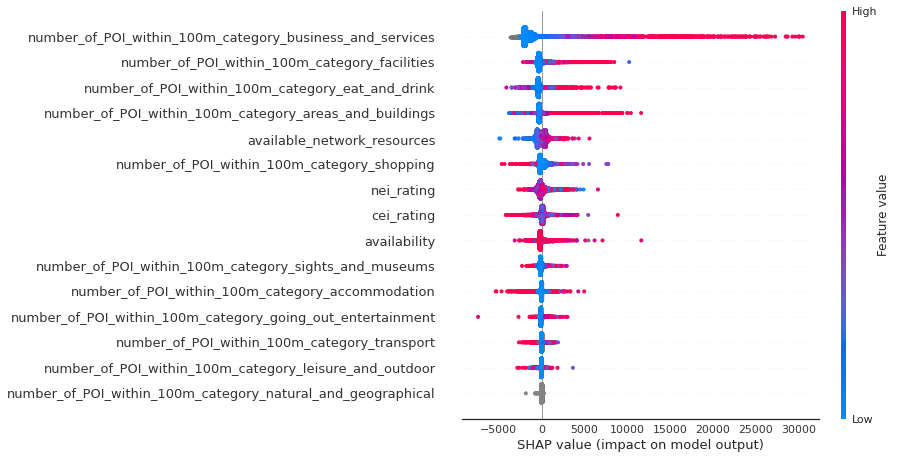

In [60]:
X           = iudf.drop(['subs_4g','kecamatan'], axis=1)
y           = iudf[['subs_4g']]
#y           = np.y['subs_4g']
model       = xgb.XGBRegressor().fit(X, y)
explainer   = shap.Explainer(model)
shap_values = explainer(X)
shap.plots.beeswarm(shap_values, max_display=15)

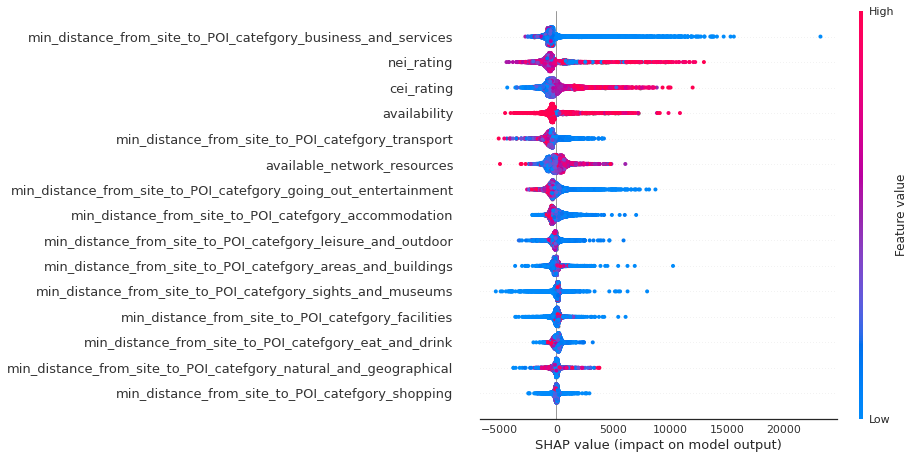

In [9]:
X           = df_100m.drop(['subs_4g','kecamatan'], axis=1)
y           = df_100m[['subs_4g']]
#y           = np.y['subs_4g']
model       = xgb.XGBRegressor().fit(X, y)
explainer   = shap.Explainer(model)
shap_values = explainer(X)
shap.plots.beeswarm(shap_values, max_display=15)

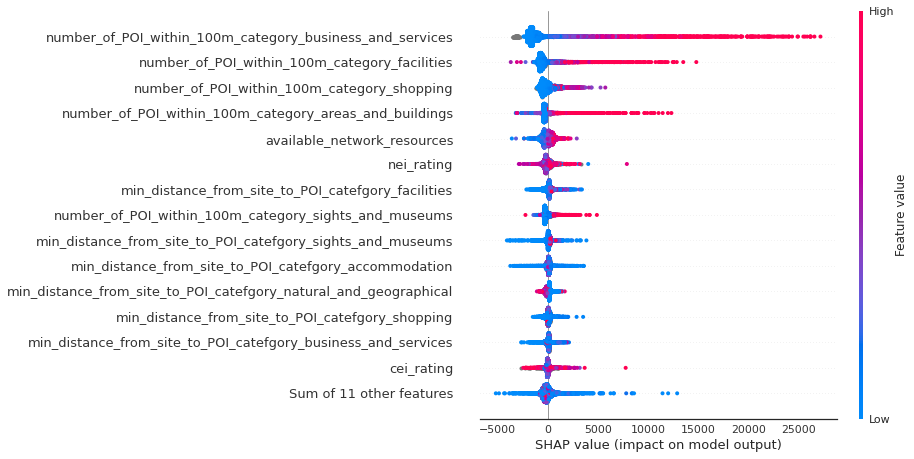

In [61]:
X           = df_param.drop(['subs_4g','kecamatan'], axis=1)
y           = df_param[['subs_4g']]
#y           = np.y['subs_4g']
model       = xgb.XGBRegressor().fit(X, y)
explainer   = shap.Explainer(model)
shap_values = explainer(X)
shap.plots.beeswarm(shap_values, max_display=15)

In [ ]:
from numpy import absolute
model       = xgb.XGBRegressor().fit(X, y)
cv          = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
scores      = cross_val_score(model, X, y, scoring='r2', cv=cv, n_jobs=-1)
scores      = absolute(scores)
print('Mean r2: %.1f (%.1f)' % (scores.mean(), scores.std()))

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
model = RandomForestRegressor()
model.fit(X, y)

In [ ]:
sklearn.metrics.SCORERS.keys()

In [ ]:
y.median()

In [ ]:
#Trial :

y_pred = model.predict(X)

In [ ]:
#Trial :

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(X, y)

_________________________________________________

In [ ]:
model = RandomForestRegressor()
model.fit(X, y)

In [ ]:
model = DecisionTreeRegressor()
model.fit(X, y)

# PyCaret :

In [4]:
from pycaret.regression import *

In [10]:
df_input.dtypes

site_id                                                              object
site_name                                                            object
long                                                                float64
lat                                                                 float64
class                                                                object
kecamatan                                                            object
kabupaten                                                            object
region                                                               object
subs_4g                                                              object
min_distance_from_site_to_POI_catefgory_leisure_and_outdoor         float64
min_distance_from_site_to_POI_catefgory_areas_and_buildings         float64
min_distance_from_site_to_POI_catefgory_shopping                    float64
min_distance_from_site_to_POI_catefgory_going_out_entertainment     float64
min_distance

In [32]:
df_param2.isnull().sum()

subs_4g                                                             448
min_distance_from_site_to_POI_catefgory_leisure_and_outdoor           0
min_distance_from_site_to_POI_catefgory_areas_and_buildings           0
min_distance_from_site_to_POI_catefgory_shopping                      0
min_distance_from_site_to_POI_catefgory_going_out_entertainment       0
min_distance_from_site_to_POI_catefgory_sights_and_museums            0
min_distance_from_site_to_POI_catefgory_facilities                    0
min_distance_from_site_to_POI_catefgory_accommodation                 0
min_distance_from_site_to_POI_catefgory_natural_and_geographical      0
min_distance_from_site_to_POI_catefgory_business_and_services         0
min_distance_from_site_to_POI_catefgory_transport                     0
min_distance_from_site_to_POI_catefgory_eat_and_drink                 0
number_of_POI_within_100m_category_leisure_and_outdoor                0
number_of_POI_within_100m_category_areas_and_buildings          

In [33]:
df_param2 = df_param2.dropna(how='any')

In [26]:
df_param2 = df_input.drop(['site_id', 'site_name', 'long', 'lat', 'class', 'kecamatan',
       'kabupaten', 'region'], axis=1)

In [29]:
df_param2[['subs_4g','availability','available_network_resources']] = df_param2[['subs_4g','availability','available_network_resources']].astype(float)

In [13]:
df_param2['subs_4g'] = df_param2['subs_4g'].astype(float)

In [16]:
df_param2['availability'] = df_param2['availability'].astype(float)

In [34]:
df_param2=df_param2.astype(int)

In [35]:
df_param2.dtypes

subs_4g                                                             int64
min_distance_from_site_to_POI_catefgory_leisure_and_outdoor         int64
min_distance_from_site_to_POI_catefgory_areas_and_buildings         int64
min_distance_from_site_to_POI_catefgory_shopping                    int64
min_distance_from_site_to_POI_catefgory_going_out_entertainment     int64
min_distance_from_site_to_POI_catefgory_sights_and_museums          int64
min_distance_from_site_to_POI_catefgory_facilities                  int64
min_distance_from_site_to_POI_catefgory_accommodation               int64
min_distance_from_site_to_POI_catefgory_natural_and_geographical    int64
min_distance_from_site_to_POI_catefgory_business_and_services       int64
min_distance_from_site_to_POI_catefgory_transport                   int64
min_distance_from_site_to_POI_catefgory_eat_and_drink               int64
number_of_POI_within_100m_category_leisure_and_outdoor              int64
number_of_POI_within_100m_category_are

In [36]:
reg = setup(data = df_input, 
             target = 'subs_4g',
             numeric_imputation = 'mean',
             categorical_features = []  , 
             ignore_features = ['site_id', 'site_name', 'long', 'lat', 'kecamatan','class',
       'kabupaten', 'region'],
             normalize = True,
             silent = True)

,Description,Value
0,session_id,1774
1,Target,subs_4g
2,Original Data,"(58153, 31)"
3,Missing Values,False
4,Numeric Features,20
5,Categorical Features,2
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(40707, 2008)"


In [37]:
compare_models()

IntProgress(value=0, description='Processing: ', max=99)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,13:54:38
Status,. . . . . . . . . . . . . . . . . .,Compiling Final Models
Estimator,. . . . . . . . . . . . . . . . . .,Linear Regression


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,0,0,0,0,0,0,1.036
lasso,Lasso Regression,0,0,0,0,0,0,0.427
en,Elastic Net,0,0,0,0,0,0,0.428
llar,Lasso Least Angle Regression,0,0,0,0,0,0,0.746
ada,AdaBoost Regressor,0,0,0,0,0,0,0.573
gbr,Gradient Boosting Regressor,0,0,0,0,0,0,0.41
catboost,CatBoost Regressor,0,0,0,0,0,0,0.554


ValueError: array must not contain infs or NaNs

In [142]:
cb = create_model('catboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1507,8.589e+06,2931,0.7988,0.6591,0.6623
1,1513,9.105e+06,3017,0.8198,0.6673,0.7577
2,1588,9.69e+06,3113,0.8041,0.7008,0.6261
3,1331,5.739e+06,2396,0.8186,0.6746,0.6801
4,1227,5.61e+06,2369,0.7772,0.6928,0.6462
5,1462,7.056e+06,2656,0.8429,0.6535,0.6702
6,1619,1.284e+07,3583,0.7513,0.7146,0.691
7,1458,6.958e+06,2638,0.8635,0.6449,0.6556
8,1485,7.223e+06,2688,0.8663,0.6143,0.6081
9,1411,6.481e+06,2546,0.8558,0.6674,0.6636


INFO:logs:create_model_container: 20
INFO:logs:master_model_container: 20
INFO:logs:display_container: 3
INFO:logs:<catboost.core.CatBoostRegressor object at 0x7f1d14d5d080>
INFO:logs:create_model() succesfully completed......................................


In [143]:
tuned_cb = tune_model(cb)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1506,8.13e+06,2851,0.8095,0.721,0.84
1,1583,9.282e+06,3047,0.8163,0.7752,1.064
2,1719,1.164e+07,3412,0.7647,0.7068,0.7877
3,1431,6.336e+06,2517,0.7997,0.7032,0.8658
4,1292,5.581e+06,2362,0.7783,0.7021,0.8155
5,1598,7.852e+06,2802,0.8252,0.7206,0.851
6,1679,1.186e+07,3444,0.7702,0.7417,0.9173
7,1580,7.579e+06,2753,0.8513,0.7384,0.8996
8,1558,7.852e+06,2802,0.8546,0.7356,0.7709
9,1544,7.123e+06,2669,0.8415,0.7209,0.8689


INFO:logs:create_model_container: 21
INFO:logs:master_model_container: 21
INFO:logs:display_container: 4
INFO:logs:<catboost.core.CatBoostRegressor object at 0x7f1b6cee1710>
INFO:logs:tune_model() succesfully completed......................................


INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(use_train_data=False, estimator=<catboost.core.CatBoostRegressor object at 0x7f1b6f2dd978>, save=False, plot=summary, observation=None, kwargs={}, feature=None)
INFO:logs:Checking exceptions
INFO:logs:plot type: summary
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values


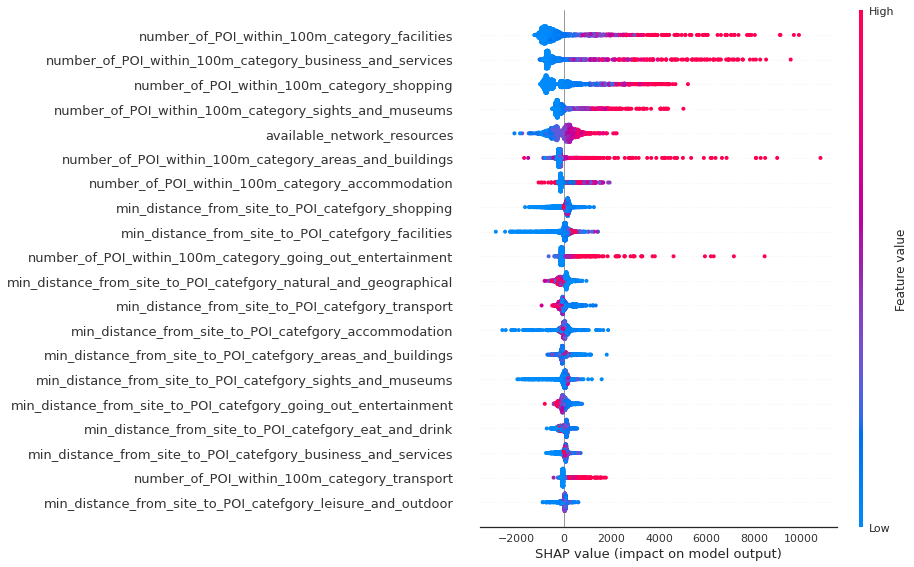

INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................


In [72]:
interpret_model(tuned_cb)

In [73]:
df_param3 = df_param

In [74]:
predictions = predict_model(tuned_cb, data = df_param2)
df_param3 = predictions['Label']
df_param.to_csv('IUDF_5G_2.csv',index=False)
df_param.head()

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(display=None, ml_usecase=MLUsecase.REGRESSION, verbose=True, round=4, encoded_labels=True, probability_threshold=None, estimator=<catboost.core.CatBoostRegressor object at 0x7f1b6e93dc18>)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


0      999.940686
1    12756.302537
2     5235.522983
4     6777.664403
5      879.767188
Name: Label, dtype: float64

In [75]:
# Initialize your Jupyter notebook with initjs(), otherwise you will get an error message.
shap.initjs()

# Write in a function
def shap_plot(j):
    explainerModel = shap.TreeExplainer(cb)
    shap_values_Model = explainerModel.shap_values(S)
    p = shap.force_plot(explainerModel.expected_value, shap_values_Model[j], S.iloc[[j]])
    return(p)

In [153]:
cb.feature_importances_.tolist()

[1.622521316242692,
 1.6712633884939367,
 2.02593629206054,
 1.3538820930724427,
 4.1633702236994115,
 4.923424554750294,
 4.2005606937432916,
 2.568212927465102,
 1.9623487033102778,
 1.6985969810937822,
 1.4277392338156338,
 0.5477854032654517,
 10.825723986834667,
 12.520736330244826,
 2.7574951114256963,
 6.451476126035496,
 12.238994912010309,
 3.3556684571090765,
 16.286082607890798,
 2.510439909230166,
 0.5573828818966852,
 3.320775005677541,
 0.017188199784029263,
 0.006712860845049329,
 0.003925729437527621,
 0.0,
 0.3455303723190011,
 0.3171585394930346,
 0.0005838973422571464,
 0.3184832614109942]

In [148]:
df_param2.info()

AttributeError: 'CatBoostRegressor' object has no attribute 'info'

In [150]:
df_importance_score = pd.DataFrame({'Feature': get_config('X_train').columns, 'Value' : abs(cb.feature_importances_)}).sort_values(by='Value', ascending=False)

INFO:logs:Initializing get_config()
INFO:logs:get_config(variable=X_train)
INFO:logs:Global variable: X_train returned as       min_distance_from_site_to_POI_catefgory_leisure_and_outdoor  \
1423                                           0.247944             
2230                                           0.558087             
1443                                          -0.387516             
5291                                          -0.661019             
556                                           -0.857171             
...                                                 ...             
2655                                           1.904507             
2737                                          -0.794995             
2659                                          -0.538516             
570                                            1.543290             
2606                                          -0.372342             

      min_distance_from_site_to_POI_catefgory_are

INFO:logs:get_config() succesfully completed......................................


In [151]:
print (get_config('X_train').columns)

INFO:logs:Initializing get_config()
INFO:logs:get_config(variable=X_train)
INFO:logs:Global variable: X_train returned as       min_distance_from_site_to_POI_catefgory_leisure_and_outdoor  \
1423                                           0.247944             
2230                                           0.558087             
1443                                          -0.387516             
5291                                          -0.661019             
556                                           -0.857171             
...                                                 ...             
2655                                           1.904507             
2737                                          -0.794995             
2659                                          -0.538516             
570                                            1.543290             
2606                                          -0.372342             

      min_distance_from_site_to_POI_catefgory_are

INFO:logs:get_config() succesfully completed......................................


Index(['min_distance_from_site_to_POI_catefgory_leisure_and_outdoor',
       'min_distance_from_site_to_POI_catefgory_areas_and_buildings',
       'min_distance_from_site_to_POI_catefgory_shopping',
       'min_distance_from_site_to_POI_catefgory_going_out_entertainment',
       'min_distance_from_site_to_POI_catefgory_sights_and_museums',
       'min_distance_from_site_to_POI_catefgory_facilities',
       'min_distance_from_site_to_POI_catefgory_accommodation',
       'min_distance_from_site_to_POI_catefgory_natural_and_geographical',
       'min_distance_from_site_to_POI_catefgory_business_and_services',
       'min_distance_from_site_to_POI_catefgory_transport',
       'min_distance_from_site_to_POI_catefgory_eat_and_drink',
       'number_of_POI_within_100m_category_leisure_and_outdoor',
       'number_of_POI_within_100m_category_areas_and_buildings',
       'number_of_POI_within_100m_category_shopping',
       'number_of_POI_within_100m_category_going_out_entertainment',
       'n

In [90]:
# Normalization 1 :

from sklearn import preprocessing

norm = df_param2.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
norm_scaled = min_max_scaler.fit_transform(norm)
df_norm = pd.DataFrame(norm_scaled,columns=df_param2.columns)

In [91]:
df_norm.head()

,subs_4g,min_distance_from_site_to_POI_catefgory_leisure_and_outdoor,min_distance_from_site_to_POI_catefgory_areas_and_buildings,min_distance_from_site_to_POI_catefgory_shopping,min_distance_from_site_to_POI_catefgory_going_out_entertainment,min_distance_from_site_to_POI_catefgory_sights_and_museums,min_distance_from_site_to_POI_catefgory_facilities,min_distance_from_site_to_POI_catefgory_accommodation,min_distance_from_site_to_POI_catefgory_natural_and_geographical,min_distance_from_site_to_POI_catefgory_business_and_services,...,number_of_POI_within_100m_category_sights_and_museums,number_of_POI_within_100m_category_facilities,number_of_POI_within_100m_category_accommodation,number_of_POI_within_100m_category_natural_and_geographical,number_of_POI_within_100m_category_business_and_services,number_of_POI_within_100m_category_transport,availability,cei_rating,nei_rating,available_network_resources
0,0.001631,0.429918,0.091240,0.414530,0.737584,0.078775,0.018624,0.926943,0.000000,0.333555,...,0.000000,0.000000,0.000,0.0,0.000000,0.000000,1.00,0.333333,1.0,0.259259
1,0.177663,0.017055,0.015562,0.003189,0.012596,0.006176,0.003465,0.010256,0.000000,0.002414,...,0.250000,0.167718,0.052,0.0,0.137931,0.046512,1.00,0.666667,1.0,0.283951
2,0.085208,0.105092,0.055974,0.011192,0.128959,0.021994,0.012055,0.083917,0.224045,0.015205,...,0.005435,0.015132,0.000,0.0,0.009339,0.000000,0.99,0.666667,1.0,0.330247
3,0.089393,0.047021,0.029556,0.005064,0.043546,0.008886,0.008662,0.042169,0.188031,0.006939,...,0.038043,0.027743,0.000,0.0,0.020115,0.000000,1.00,0.666667,1.0,0.280864
4,0.010150,0.129354,0.020896,0.001250,0.178203,0.006491,0.007363,0.126810,0.245498,0.007180,...,0.005435,0.001261,0.000,0.0,0.001437,0.000000,1.00,0.333333,1.0,0.583333


In [121]:
df_importance_score.loc[df_importance_score['Feature']=='number_of_POI_within_100m_category_facilities',['Value']].values[0][0]

14.540877905935066

In [155]:
# Scoring - Site Data also need to be normalized :
df_input.columns

Index(['site_id', 'subs_4g',
       'min_distance_from_site_to_POI_catefgory_leisure_and_outdoor',
       'min_distance_from_site_to_POI_catefgory_areas_and_buildings',
       'min_distance_from_site_to_POI_catefgory_shopping',
       'min_distance_from_site_to_POI_catefgory_going_out_entertainment',
       'min_distance_from_site_to_POI_catefgory_sights_and_museums',
       'min_distance_from_site_to_POI_catefgory_facilities',
       'min_distance_from_site_to_POI_catefgory_accommodation',
       'min_distance_from_site_to_POI_catefgory_natural_and_geographical',
       'min_distance_from_site_to_POI_catefgory_business_and_services',
       'min_distance_from_site_to_POI_catefgory_transport',
       'min_distance_from_site_to_POI_catefgory_eat_and_drink',
       'number_of_POI_within_100m_category_leisure_and_outdoor',
       'number_of_POI_within_100m_category_areas_and_buildings',
       'number_of_POI_within_100m_category_shopping',
       'number_of_POI_within_100m_category_going_

In [156]:
df_importance_score

,Feature,Value
18,number_of_POI_within_100m_category_business_an...,16.286083
13,number_of_POI_within_100m_category_shopping,12.520736
16,number_of_POI_within_100m_category_facilities,12.238995
12,number_of_POI_within_100m_category_areas_and_b...,10.825724
15,number_of_POI_within_100m_category_sights_and_...,6.451476
5,min_distance_from_site_to_POI_catefgory_facili...,4.923425
6,min_distance_from_site_to_POI_catefgory_accomm...,4.200561
4,min_distance_from_site_to_POI_catefgory_sights...,4.163370
17,number_of_POI_within_100m_category_accommodation,3.355668
21,available_network_resources,3.320775


In [164]:
col_input = ['min_distance_from_site_to_POI_catefgory_leisure_and_outdoor',
       'min_distance_from_site_to_POI_catefgory_areas_and_buildings',
       'min_distance_from_site_to_POI_catefgory_shopping',
       'min_distance_from_site_to_POI_catefgory_going_out_entertainment',
       'min_distance_from_site_to_POI_catefgory_sights_and_museums',
       'min_distance_from_site_to_POI_catefgory_facilities',
       'min_distance_from_site_to_POI_catefgory_accommodation',
       'min_distance_from_site_to_POI_catefgory_natural_and_geographical',
       'min_distance_from_site_to_POI_catefgory_business_and_services',
       'min_distance_from_site_to_POI_catefgory_transport',
       'min_distance_from_site_to_POI_catefgory_eat_and_drink',
       'number_of_POI_within_100m_category_leisure_and_outdoor',
       'number_of_POI_within_100m_category_areas_and_buildings',
       'number_of_POI_within_100m_category_shopping',
       'number_of_POI_within_100m_category_going_out_entertainment',
       'number_of_POI_within_100m_category_sights_and_museums',
       'number_of_POI_within_100m_category_facilities',
       'number_of_POI_within_100m_category_accommodation',
       'number_of_POI_within_100m_category_business_and_services',
       'number_of_POI_within_100m_category_transport', 'availability',
       'available_network_resources']

for i in col_input:
    norm=df_input[[i]].values
    min_max_scaler = preprocessing.MinMaxScaler()
    norm_scaled = min_max_scaler.fit_transform(norm)
    df_final_input = pd.DataFrame(norm_scaled,columns=[i])
    df_input[[i]]=df_final_input[i]

In [158]:
df_input.describe()

,min_distance_from_site_to_POI_catefgory_leisure_and_outdoor,min_distance_from_site_to_POI_catefgory_areas_and_buildings,min_distance_from_site_to_POI_catefgory_shopping,min_distance_from_site_to_POI_catefgory_going_out_entertainment,min_distance_from_site_to_POI_catefgory_sights_and_museums,min_distance_from_site_to_POI_catefgory_facilities,min_distance_from_site_to_POI_catefgory_accommodation,min_distance_from_site_to_POI_catefgory_natural_and_geographical,min_distance_from_site_to_POI_catefgory_business_and_services,min_distance_from_site_to_POI_catefgory_transport,min_distance_from_site_to_POI_catefgory_eat_and_drink,number_of_POI_within_100m_category_leisure_and_outdoor,number_of_POI_within_100m_category_areas_and_buildings,number_of_POI_within_100m_category_shopping,number_of_POI_within_100m_category_going_out_entertainment,number_of_POI_within_100m_category_sights_and_museums,number_of_POI_within_100m_category_facilities,number_of_POI_within_100m_category_accommodation,number_of_POI_within_100m_category_business_and_services,number_of_POI_within_100m_category_transport,availability,available_network_resources
count,58153.000000,58153.000000,58153.000000,58153.000000,58153.000000,58153.000000,58153.000000,58153.000000,58153.000000,58153.000000,58153.000000,58153.000000,58153.000000,58153.000000,58153.000000,58153.000000,58153.000000,58153.000000,58153.000000,58153.000000,57957.000000,58401.000000
mean,0.092846,0.047329,0.035048,0.095490,0.032082,0.020042,0.085024,0.193408,0.034320,0.104871,0.043634,0.006414,0.013659,0.008390,0.004084,0.016605,0.011855,0.007352,0.015385,0.008857,0.995796,0.054543
std,0.139288,0.075479,0.092497,0.150995,0.080854,0.058758,0.139828,0.216804,0.086947,0.158068,0.104417,0.033891,0.050540,0.023193,0.017892,0.033887,0.025162,0.026689,0.032553,0.034500,0.038590,0.031744
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.014691,0.011619,0.002122,0.009263,0.004942,0.002989,0.007752,0.000000,0.002517,0.008694,0.002710,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.028682
50%,0.035697,0.022847,0.005068,0.027276,0.009648,0.006018,0.021575,0.123195,0.005927,0.029142,0.006547,0.000000,0.000000,0.001590,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.043938
75%,0.102969,0.050283,0.016134,0.108399,0.020558,0.013393,0.093781,0.350063,0.018839,0.134118,0.023687,0.000000,0.000000,0.007949,0.000000,0.035714,0.013423,0.000000,0.016043,0.000000,1.000000,0.074451
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [165]:
for i in col_input:
    print (i)
    df_input[[i]]=df_input[[i]]*df_importance_score.loc[df_importance_score['Feature']==i,['Value']].values[0][0]

min_distance_from_site_to_POI_catefgory_leisure_and_outdoor
min_distance_from_site_to_POI_catefgory_areas_and_buildings
min_distance_from_site_to_POI_catefgory_shopping
min_distance_from_site_to_POI_catefgory_going_out_entertainment
min_distance_from_site_to_POI_catefgory_sights_and_museums
min_distance_from_site_to_POI_catefgory_facilities
min_distance_from_site_to_POI_catefgory_accommodation
min_distance_from_site_to_POI_catefgory_natural_and_geographical
min_distance_from_site_to_POI_catefgory_business_and_services
min_distance_from_site_to_POI_catefgory_transport
min_distance_from_site_to_POI_catefgory_eat_and_drink
number_of_POI_within_100m_category_leisure_and_outdoor
number_of_POI_within_100m_category_areas_and_buildings
number_of_POI_within_100m_category_shopping
number_of_POI_within_100m_category_going_out_entertainment
number_of_POI_within_100m_category_sights_and_museums
number_of_POI_within_100m_category_facilities
number_of_POI_within_100m_category_accommodation
number_of_

In [162]:
 df_input.columns

Index(['site_id', 'subs_4g',
       'min_distance_from_site_to_POI_catefgory_leisure_and_outdoor',
       'min_distance_from_site_to_POI_catefgory_areas_and_buildings',
       'min_distance_from_site_to_POI_catefgory_shopping',
       'min_distance_from_site_to_POI_catefgory_going_out_entertainment',
       'min_distance_from_site_to_POI_catefgory_sights_and_museums',
       'min_distance_from_site_to_POI_catefgory_facilities',
       'min_distance_from_site_to_POI_catefgory_accommodation',
       'min_distance_from_site_to_POI_catefgory_natural_and_geographical',
       'min_distance_from_site_to_POI_catefgory_business_and_services',
       'min_distance_from_site_to_POI_catefgory_transport',
       'min_distance_from_site_to_POI_catefgory_eat_and_drink',
       'number_of_POI_within_100m_category_leisure_and_outdoor',
       'number_of_POI_within_100m_category_areas_and_buildings',
       'number_of_POI_within_100m_category_shopping',
       'number_of_POI_within_100m_category_going_

In [170]:
total_weighting = ['min_distance_from_site_to_POI_catefgory_leisure_and_outdoor',
       'min_distance_from_site_to_POI_catefgory_areas_and_buildings',
       'min_distance_from_site_to_POI_catefgory_shopping',
       'min_distance_from_site_to_POI_catefgory_going_out_entertainment',
       'min_distance_from_site_to_POI_catefgory_sights_and_museums',
       'min_distance_from_site_to_POI_catefgory_facilities',
       'min_distance_from_site_to_POI_catefgory_accommodation',
       'min_distance_from_site_to_POI_catefgory_natural_and_geographical',
       'min_distance_from_site_to_POI_catefgory_business_and_services',
       'min_distance_from_site_to_POI_catefgory_transport',
       'min_distance_from_site_to_POI_catefgory_eat_and_drink',
       'number_of_POI_within_100m_category_leisure_and_outdoor',
       'number_of_POI_within_100m_category_areas_and_buildings',
       'number_of_POI_within_100m_category_shopping',
       'number_of_POI_within_100m_category_going_out_entertainment',
       'number_of_POI_within_100m_category_sights_and_museums',
       'number_of_POI_within_100m_category_facilities',
       'number_of_POI_within_100m_category_accommodation',
       'number_of_POI_within_100m_category_business_and_services',
       'number_of_POI_within_100m_category_transport', 'availability',
       'available_network_resources']

df_input['Total'] = df_input[total_weighting].sum(axis = 1)

In [171]:
df_input.head()

,site_id,subs_4g,min_distance_from_site_to_POI_catefgory_leisure_and_outdoor,min_distance_from_site_to_POI_catefgory_areas_and_buildings,min_distance_from_site_to_POI_catefgory_shopping,min_distance_from_site_to_POI_catefgory_going_out_entertainment,min_distance_from_site_to_POI_catefgory_sights_and_museums,min_distance_from_site_to_POI_catefgory_facilities,min_distance_from_site_to_POI_catefgory_accommodation,min_distance_from_site_to_POI_catefgory_natural_and_geographical,min_distance_from_site_to_POI_catefgory_business_and_services,min_distance_from_site_to_POI_catefgory_transport,min_distance_from_site_to_POI_catefgory_eat_and_drink,number_of_POI_within_100m_category_leisure_and_outdoor,number_of_POI_within_100m_category_areas_and_buildings,number_of_POI_within_100m_category_shopping,number_of_POI_within_100m_category_going_out_entertainment,number_of_POI_within_100m_category_sights_and_museums,number_of_POI_within_100m_category_facilities,number_of_POI_within_100m_category_accommodation,number_of_POI_within_100m_category_business_and_services,number_of_POI_within_100m_category_transport,availability,available_network_resources,Total
0,DPR033,176.0,0.003627,0.042379,0.002582,0.004250,0.004757,0.005038,0.004847,0.397875,0.002249,0.006535,0.001978,0.068473,0.0,0.636985,0.078786,0.46082,0.821409,0.115713,0.958005,0.156902,0.557383,0.247234,4.577827
1,BIM187,264.0,0.060347,0.103724,0.007424,0.606541,0.012922,0.150124,0.686403,0.950857,0.063696,0.289622,0.287048,0.000000,0.0,0.019906,0.000000,0.46082,0.000000,0.000000,0.000000,0.000000,0.557383,0.145909,4.402725
2,SMD390,80.0,0.269994,0.049849,0.004472,0.160799,0.027565,0.010560,0.526745,1.486922,0.004966,0.143643,0.004604,0.000000,0.0,0.278681,0.000000,0.00000,0.328564,0.000000,0.435457,0.000000,0.557383,0.044583,4.334786
3,SUB518,614.0,0.052909,0.055378,0.034712,0.024316,0.079416,0.103768,0.215914,0.000000,0.032088,0.088357,0.025398,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.557383,0.145909,1.415547
4,BIR300,107.0,0.383556,0.034314,0.049446,0.102714,0.012317,0.031985,0.476658,0.000000,0.043463,0.153849,0.016571,0.000000,0.0,0.000000,0.000000,0.23041,0.000000,0.000000,0.000000,0.000000,0.557383,0.044583,2.137248
